In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from pandas import DataFrame as df
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot as plt
import numpy as np
import GPy
import sys
import GPclust


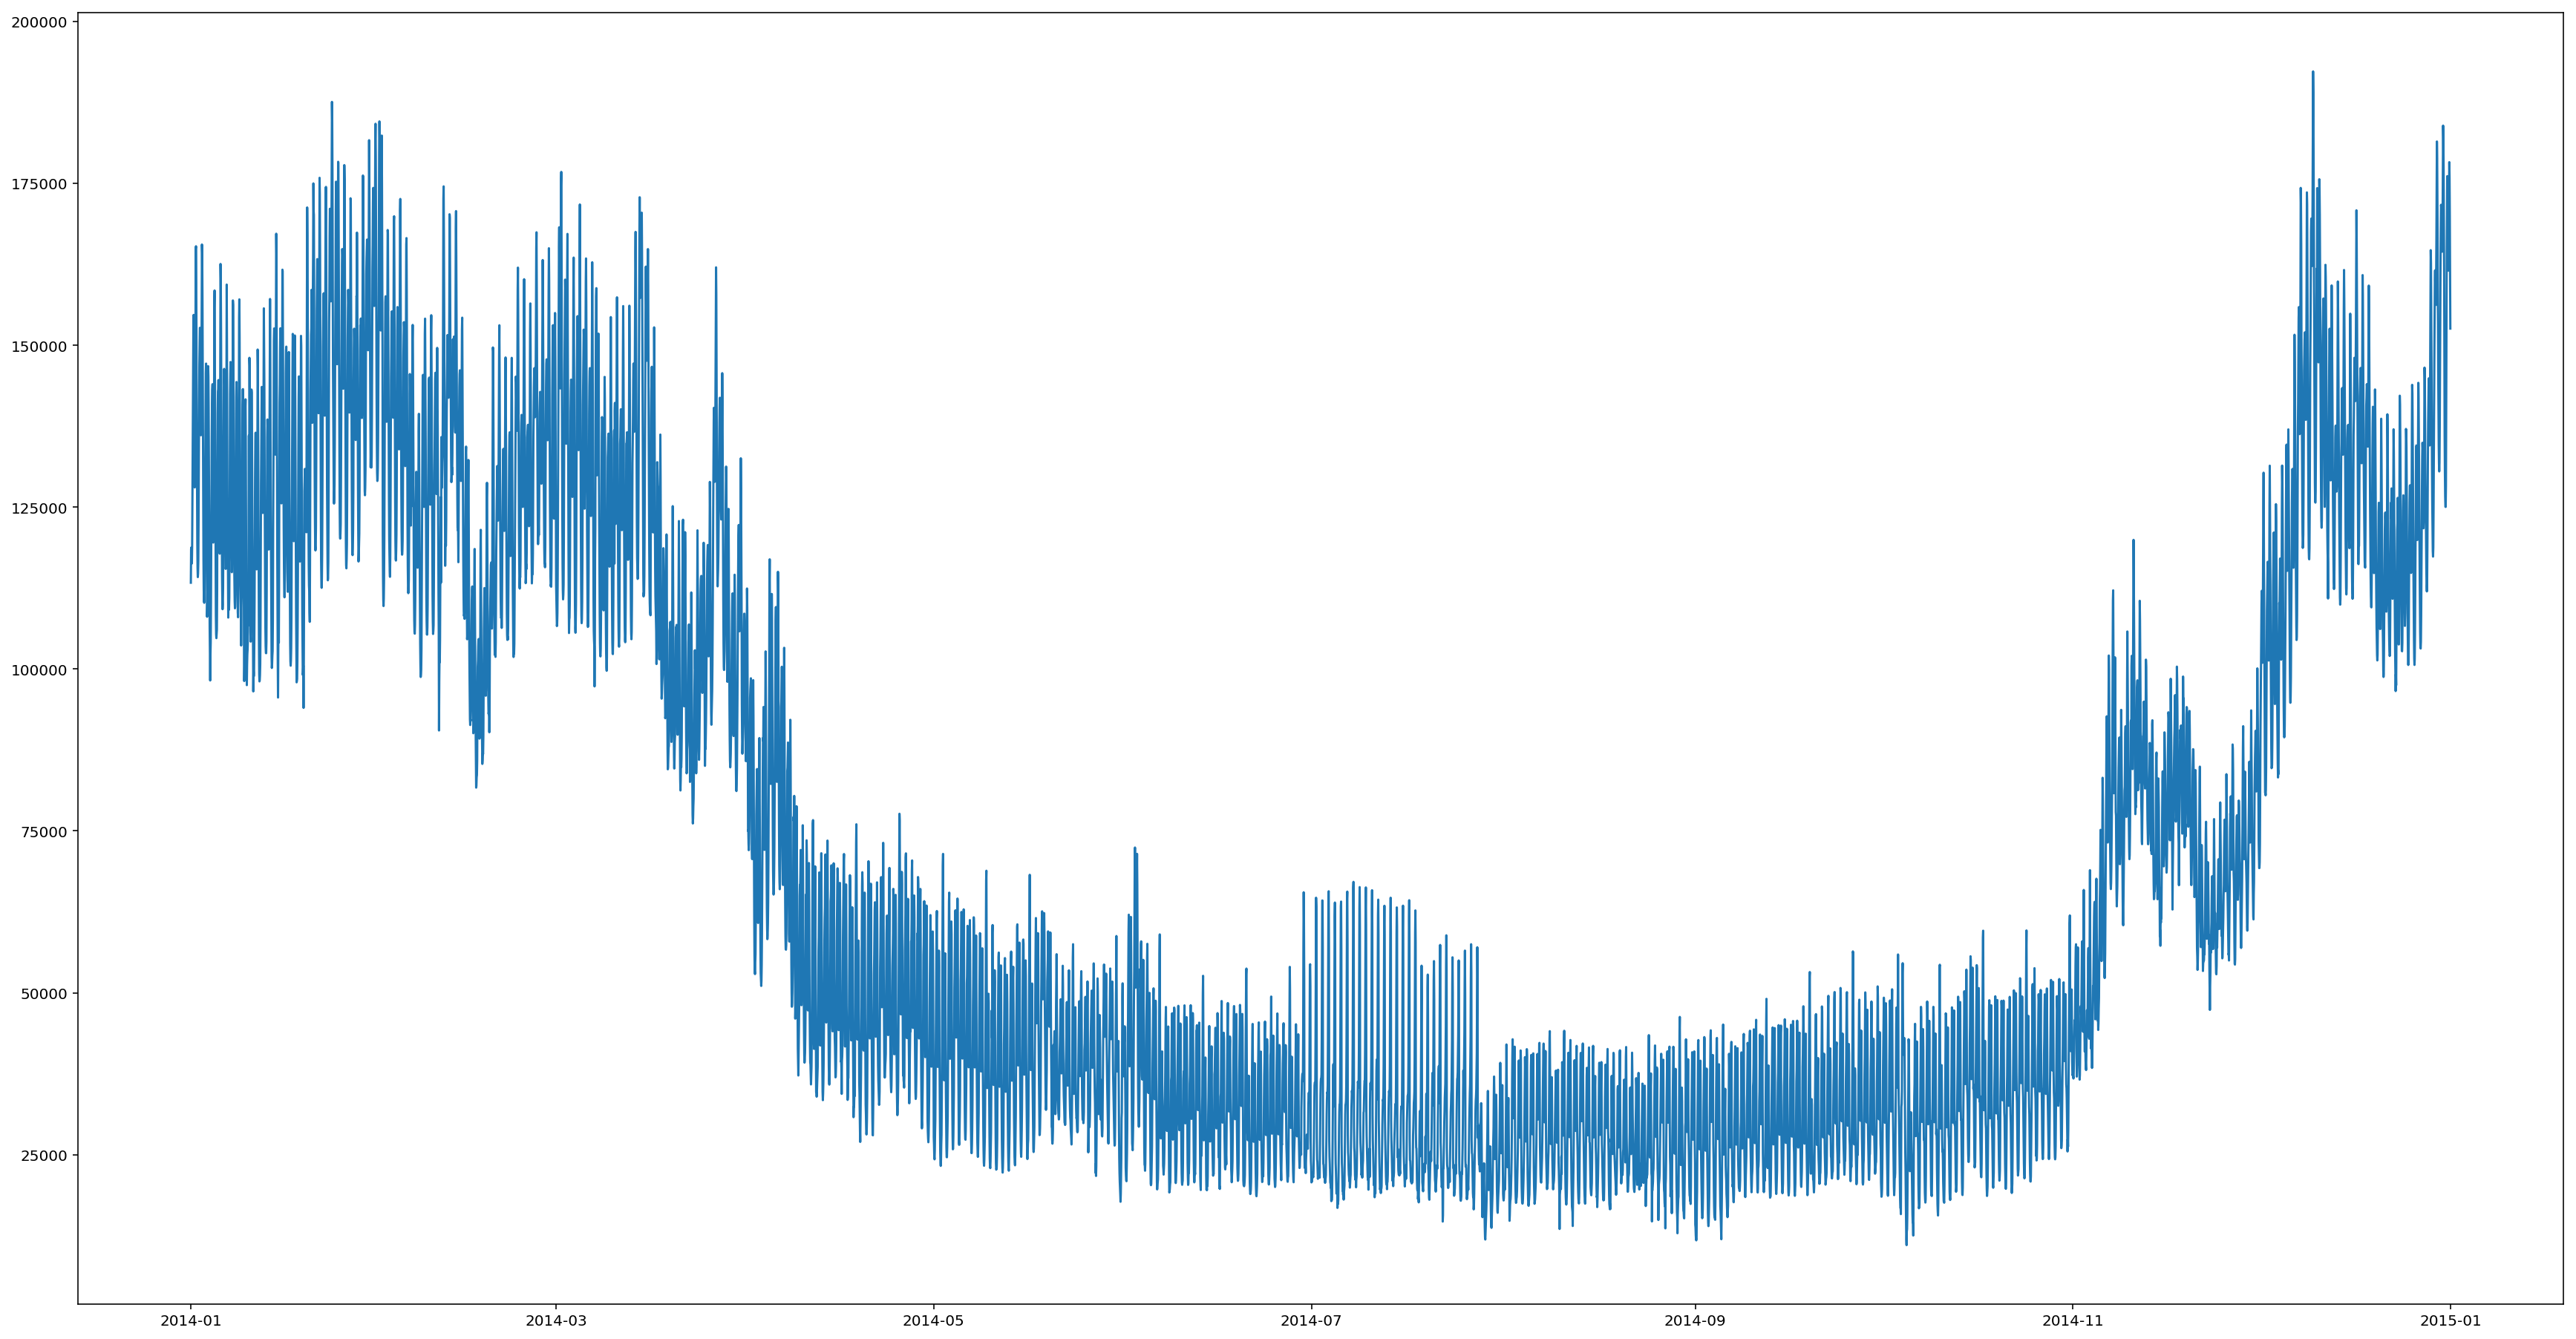

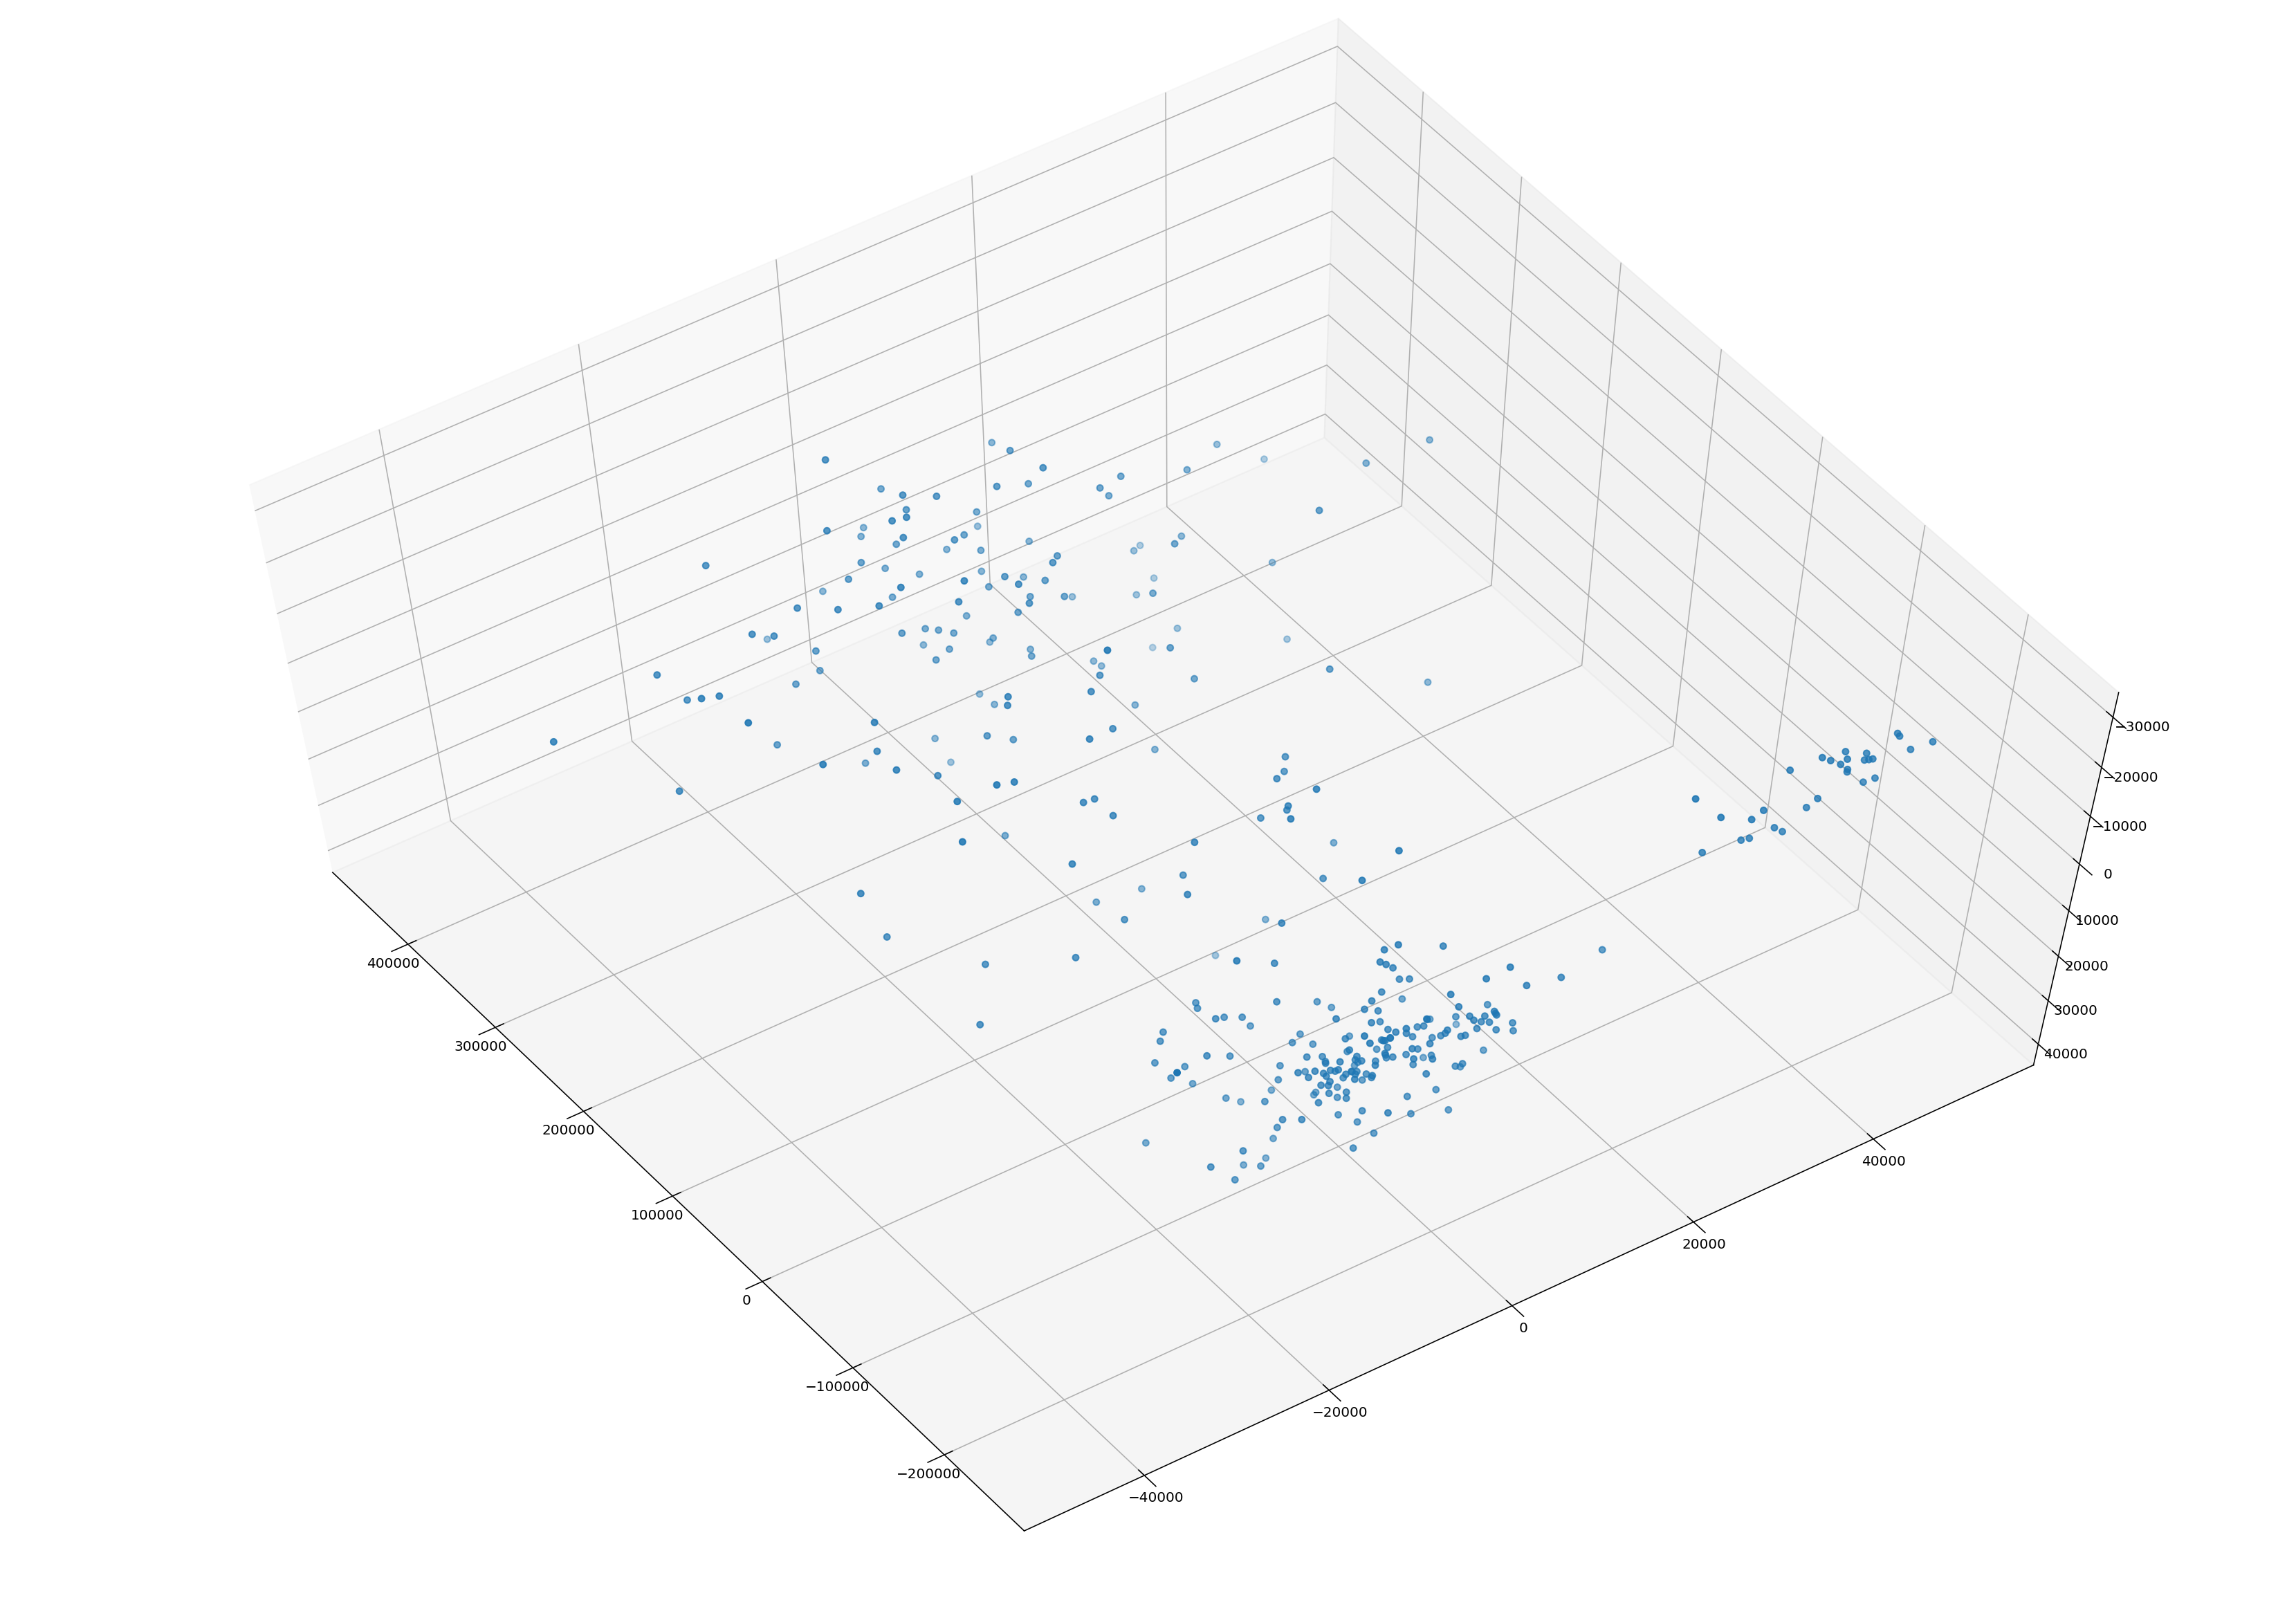

In [9]:


data = pd.read_csv('../data/DP.csv',usecols=[27],engine='python',skipfooter=None)

data= np.array(data)

plt.figure(figsize=(30,16))
plt.plot(df(data,index= pd.date_range('2014-1-1', periods=365*24, freq='H')))
plt.show()

data= data.reshape(-1,24)


daydata= df(data)
daydata.index= pd.date_range('2014-1-1', periods=365, freq='D')



x=np.array(range(0,24)).reshape(-1,1)
y=np.array(daydata)

pca= PCA(n_components=3)
pca.fit(daydata)
data_pca =  pca.transform(daydata)

fig = plt.figure(1, figsize=(24,16))


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=245, azim=35)


ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral)

plt.show()

In [12]:
k_underlying = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=12.)
k_corruption = GPy.kern.Matern52(input_dim=1, variance=0.1, lengthscale=12.) + GPy.kern.White(1, variance=0.01)

m = GPclust.MOHGP(x, k_underlying, k_corruption, y, K=20, prior_Z='DP', alpha=1.0)
m.hyperparam_opt_interval = 100 # how often to optimize the hyperparameters

m.hyperparam_opt_args['messages'] = False # turn off the printing of the optimization
m.optimize()
m.systematic_splits(verbose=False)

('\riteration 1 bound=-4.19750783021e+12 grad=1.84208159973e+21, beta=0',)
('\riteration 2 bound=-3.56552184857e+12 grad=0.0, beta=0.0',)
vb converged (gtol)
('\riteration 3 bound=-1612774762.81 grad=0.0, beta=0.0',)


 /Users/mac/anaconda/lib/python2.7/site-packages/GPclust-0.1.0-py2.7.egg/GPclust/collapsed_vb.py:104: RuntimeWarning:invalid value encountered in double_scalars


vb converged (gtol)
('\riteration 4 bound=-27747155.0455 grad=0.0, beta=0.0',)
vb converged (gtol)


 /Users/mac/anaconda/lib/python2.7/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


('\riteration 6 bound=-7081645.26155 grad=5.0520778193e-41, beta=inf',)


 /Users/mac/anaconda/lib/python2.7/site-packages/GPclust-0.1.0-py2.7.egg/GPclust/collapsed_vb.py:104: RuntimeWarning:divide by zero encountered in double_scalars
 /Users/mac/anaconda/lib/python2.7/site-packages/GPclust-0.1.0-py2.7.egg/GPclust/collapsed_vb.py:107: RuntimeWarning:invalid value encountered in multiply


vb converged (gtol)
('\riteration 7 bound=-5807199.47856 grad=0.00348377176441, beta=0.0',)
('\riteration 8 bound=-5729036.3227 grad=1.03349247191e-33, beta=0.0',)
vb converged (gtol)
('\riteration 9 bound=-4898052.72233 grad=4.87502716142e-28, beta=0.0',)
vb converged (gtol)
('\riteration 10 bound=-4540770.68731 grad=7.04745338451e-18, beta=9458613317.96',)
vb converged (gtol)
('\riteration 11 bound=-3617352.85408 grad=0.0, beta=-0.0',)
vb converged (gtol)
('\riteration 13 bound=-3126456.87938 grad=588652.261159, beta=inf',)
('\riteration 15 bound=-3119612.19034 grad=47697.1272115, beta=0.485371833225',)
('\riteration 16 bound=-3117258.82566 grad=9.35698431258e-06, beta=0.0',)
('\riteration 17 bound=-3116264.92467 grad=9.35697641709e-06, beta=1.15872726082e-22',)
('\riteration 18 bound=-3111881.49176 grad=22.8419268313, beta=0.0',)
('\riteration 19 bound=-3109170.18785 grad=9.35697641709e-06, beta=1.01533906015e-48',)
('\riteration 20 bound=-3107233.69879 grad=9.35697641709e-06, beta=

 /Users/mac/anaconda/lib/python2.7/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:overflow encountered in square
 /Users/mac/anaconda/lib/python2.7/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:invalid value encountered in multiply
 /Users/mac/anaconda/lib/python2.7/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /Users/mac/anaconda/lib/python2.7/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater


('\riteration 51 bound=-973357.412019 grad=1.59875455076e-228, beta=0.0',)
vb converged (gtol)
('\riteration 52 bound=-872242.640085 grad=1.67420090525e-184, beta=0.0',)
vb converged (gtol)
('\riteration 54 bound=-864432.778715 grad=58.8285254825, beta=5.13492323505e+185',)
('\riteration 55 bound=-864394.303016 grad=4.75463200403e-92, beta=2.69848715348e-93',)
vb converged (gtol)
('\riteration 56 bound=-861475.77072 grad=17523.024912, beta=0.0',)
('\riteration 57 bound=-861475.77072 grad=6.24449777046e-67, beta=1.13414030661e-70',)
vb converged (ftol)
vb converged (gtol)
('\riteration 58 bound=-853618.188753 grad=2.74264143323e-19, beta=0.0',)
vb converged (gtol)
('\riteration 59 bound=-226458.100326 grad=1.67947035172e-57, beta=1.24675335563e-39',)
vb converged (gtol)


 /Users/mac/anaconda/lib/python2.7/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in divide
 /Users/mac/anaconda/lib/python2.7/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:overflow encountered in multiply


('\riteration 60 bound=-219766.669777 grad=272.883342926, beta=0.0',)
('\riteration 61 bound=-219766.621613 grad=1.28319824371, beta=0.00134085201639',)
('\riteration 63 bound=-219766.621613 grad=1.45714985708e-09, beta=5.71100207132e-06',)
vb converged (ftol)
vb converged (gtol)
('\riteration 64 bound=-186268.552379 grad=0.439293335671, beta=0.0',)
('\riteration 66 bound=-186268.002066 grad=9.92855585317, beta=147.509015001',)
('\riteration 67 bound=-186268.002064 grad=2.471125273e-06, beta=8.15616551002e-06',)
('\riteration 69 bound=-186268.002064 grad=4.94033653703e-10, beta=0.0178014208979',)
vb converged (ftol)
vb converged (gtol)


  sum.               |          value  |  constraints  |  priors
  Mat52.variance     |  1546076.57883  |      +ve      |        
  Mat52.lengthscale  |  5.04964212875  |      +ve      |        
  white.variance     |  1070889.66997  |      +ve      |        


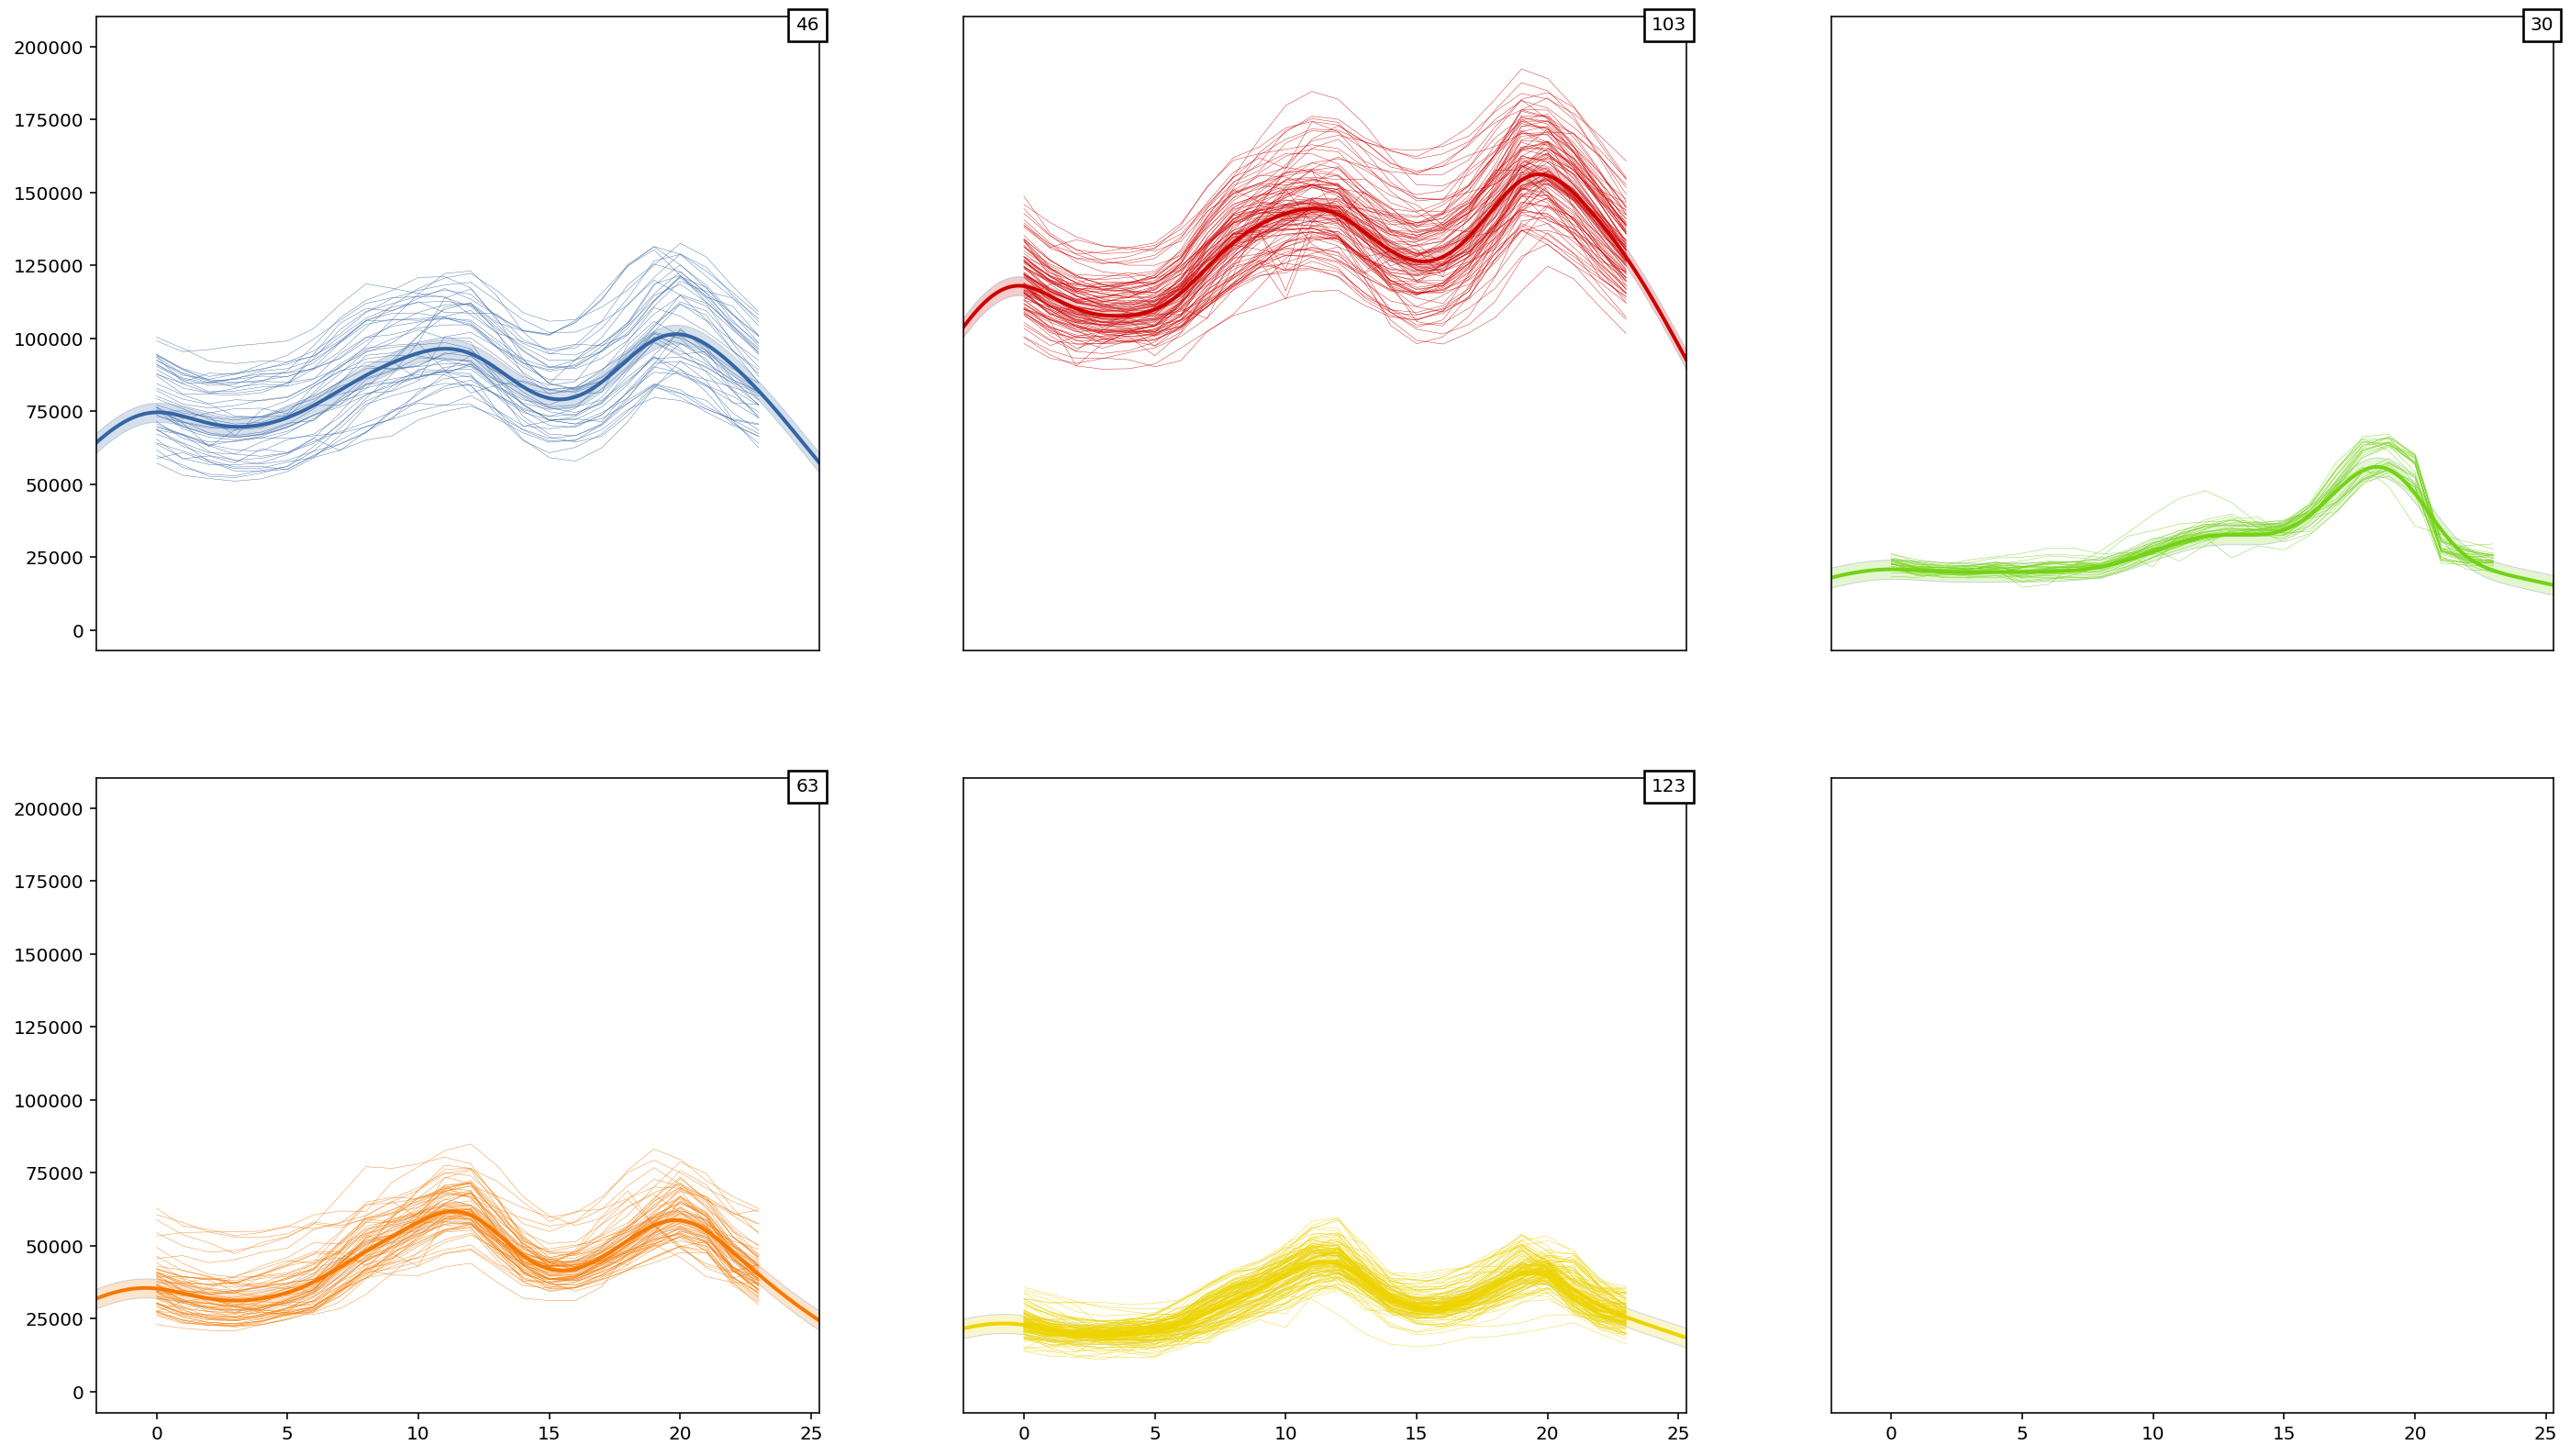

In [13]:
print(m.kernY)
plt.figure(figsize=(24,14))
plt.alpha=0.1
m.plot(on_subplots=True, colour=True, newfig=False)
plt.show()



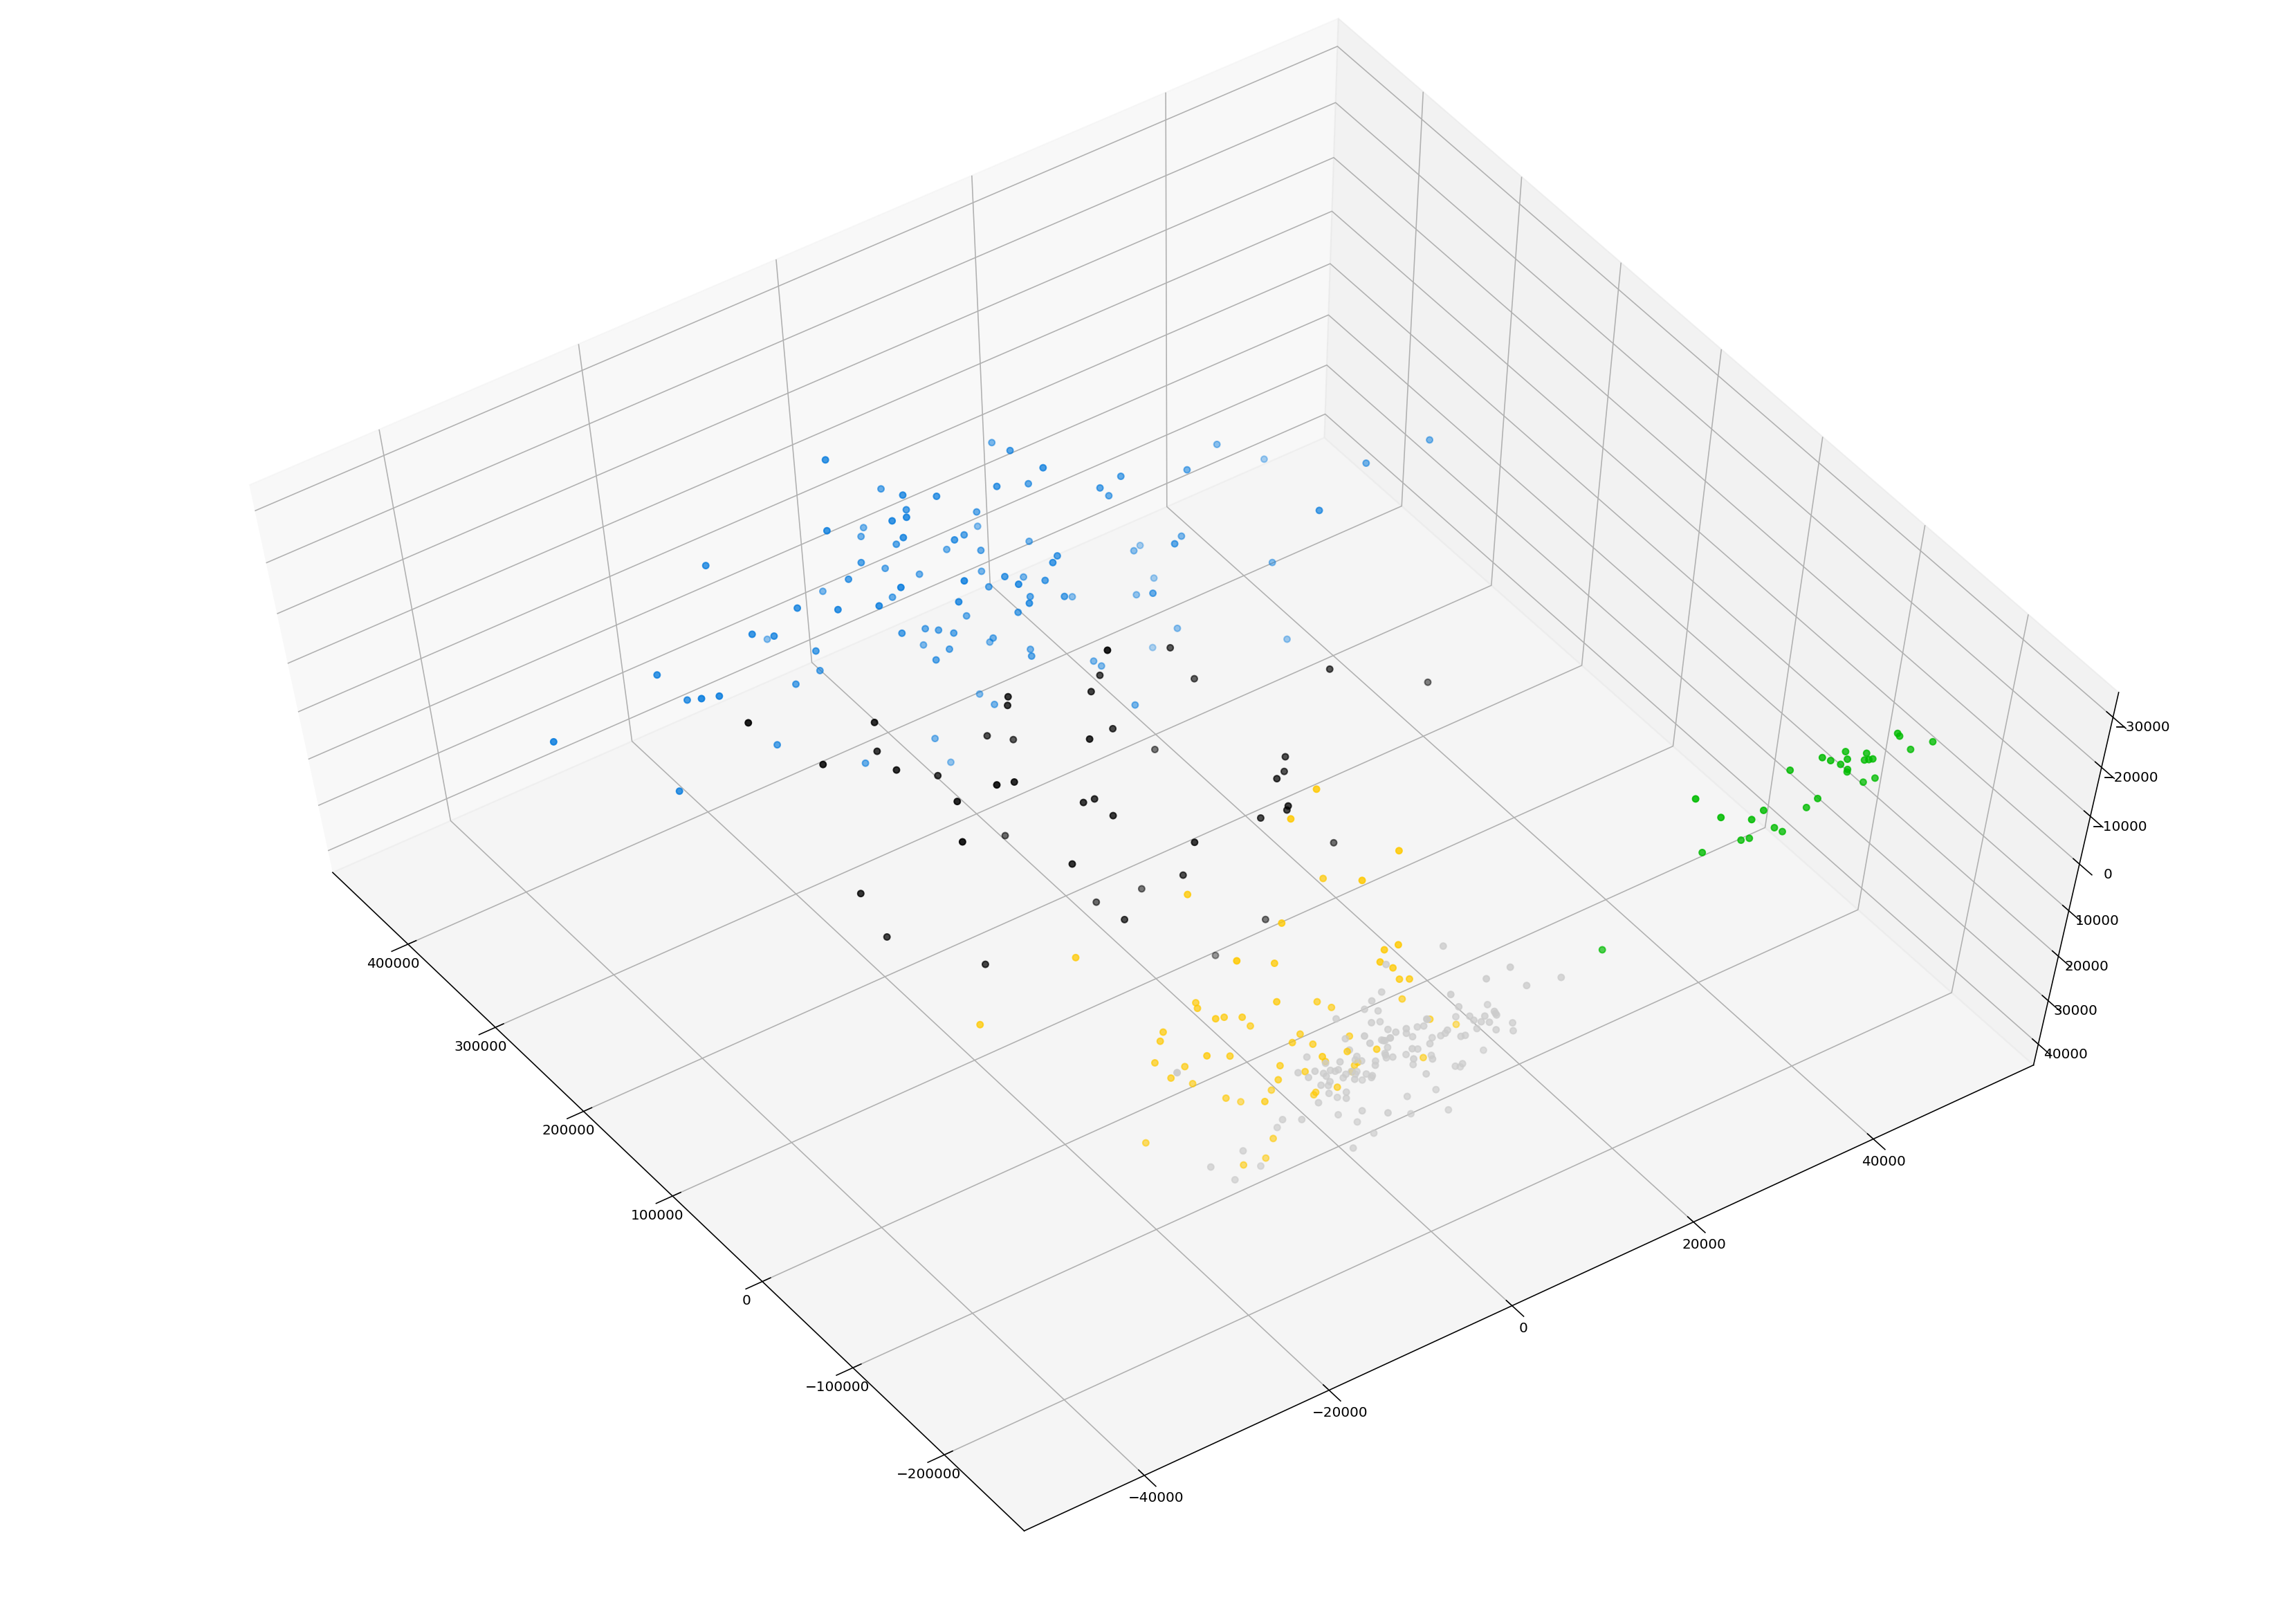

In [14]:
m.Hgrad
C = np.empty((m.Hgrad.shape[0],1),dtype=float)
for x in range(0,m.Hgrad.shape[0]):
    C[x,0] = m.Hgrad[x].argmin()

# C[C==3]=2
# C[C==4]=3

fig = plt.figure(1, figsize=(24,16))


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=245, azim=35)


ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=C)

plt.show()

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.
  4.  3.  4.  3.  3.  4.  4.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4

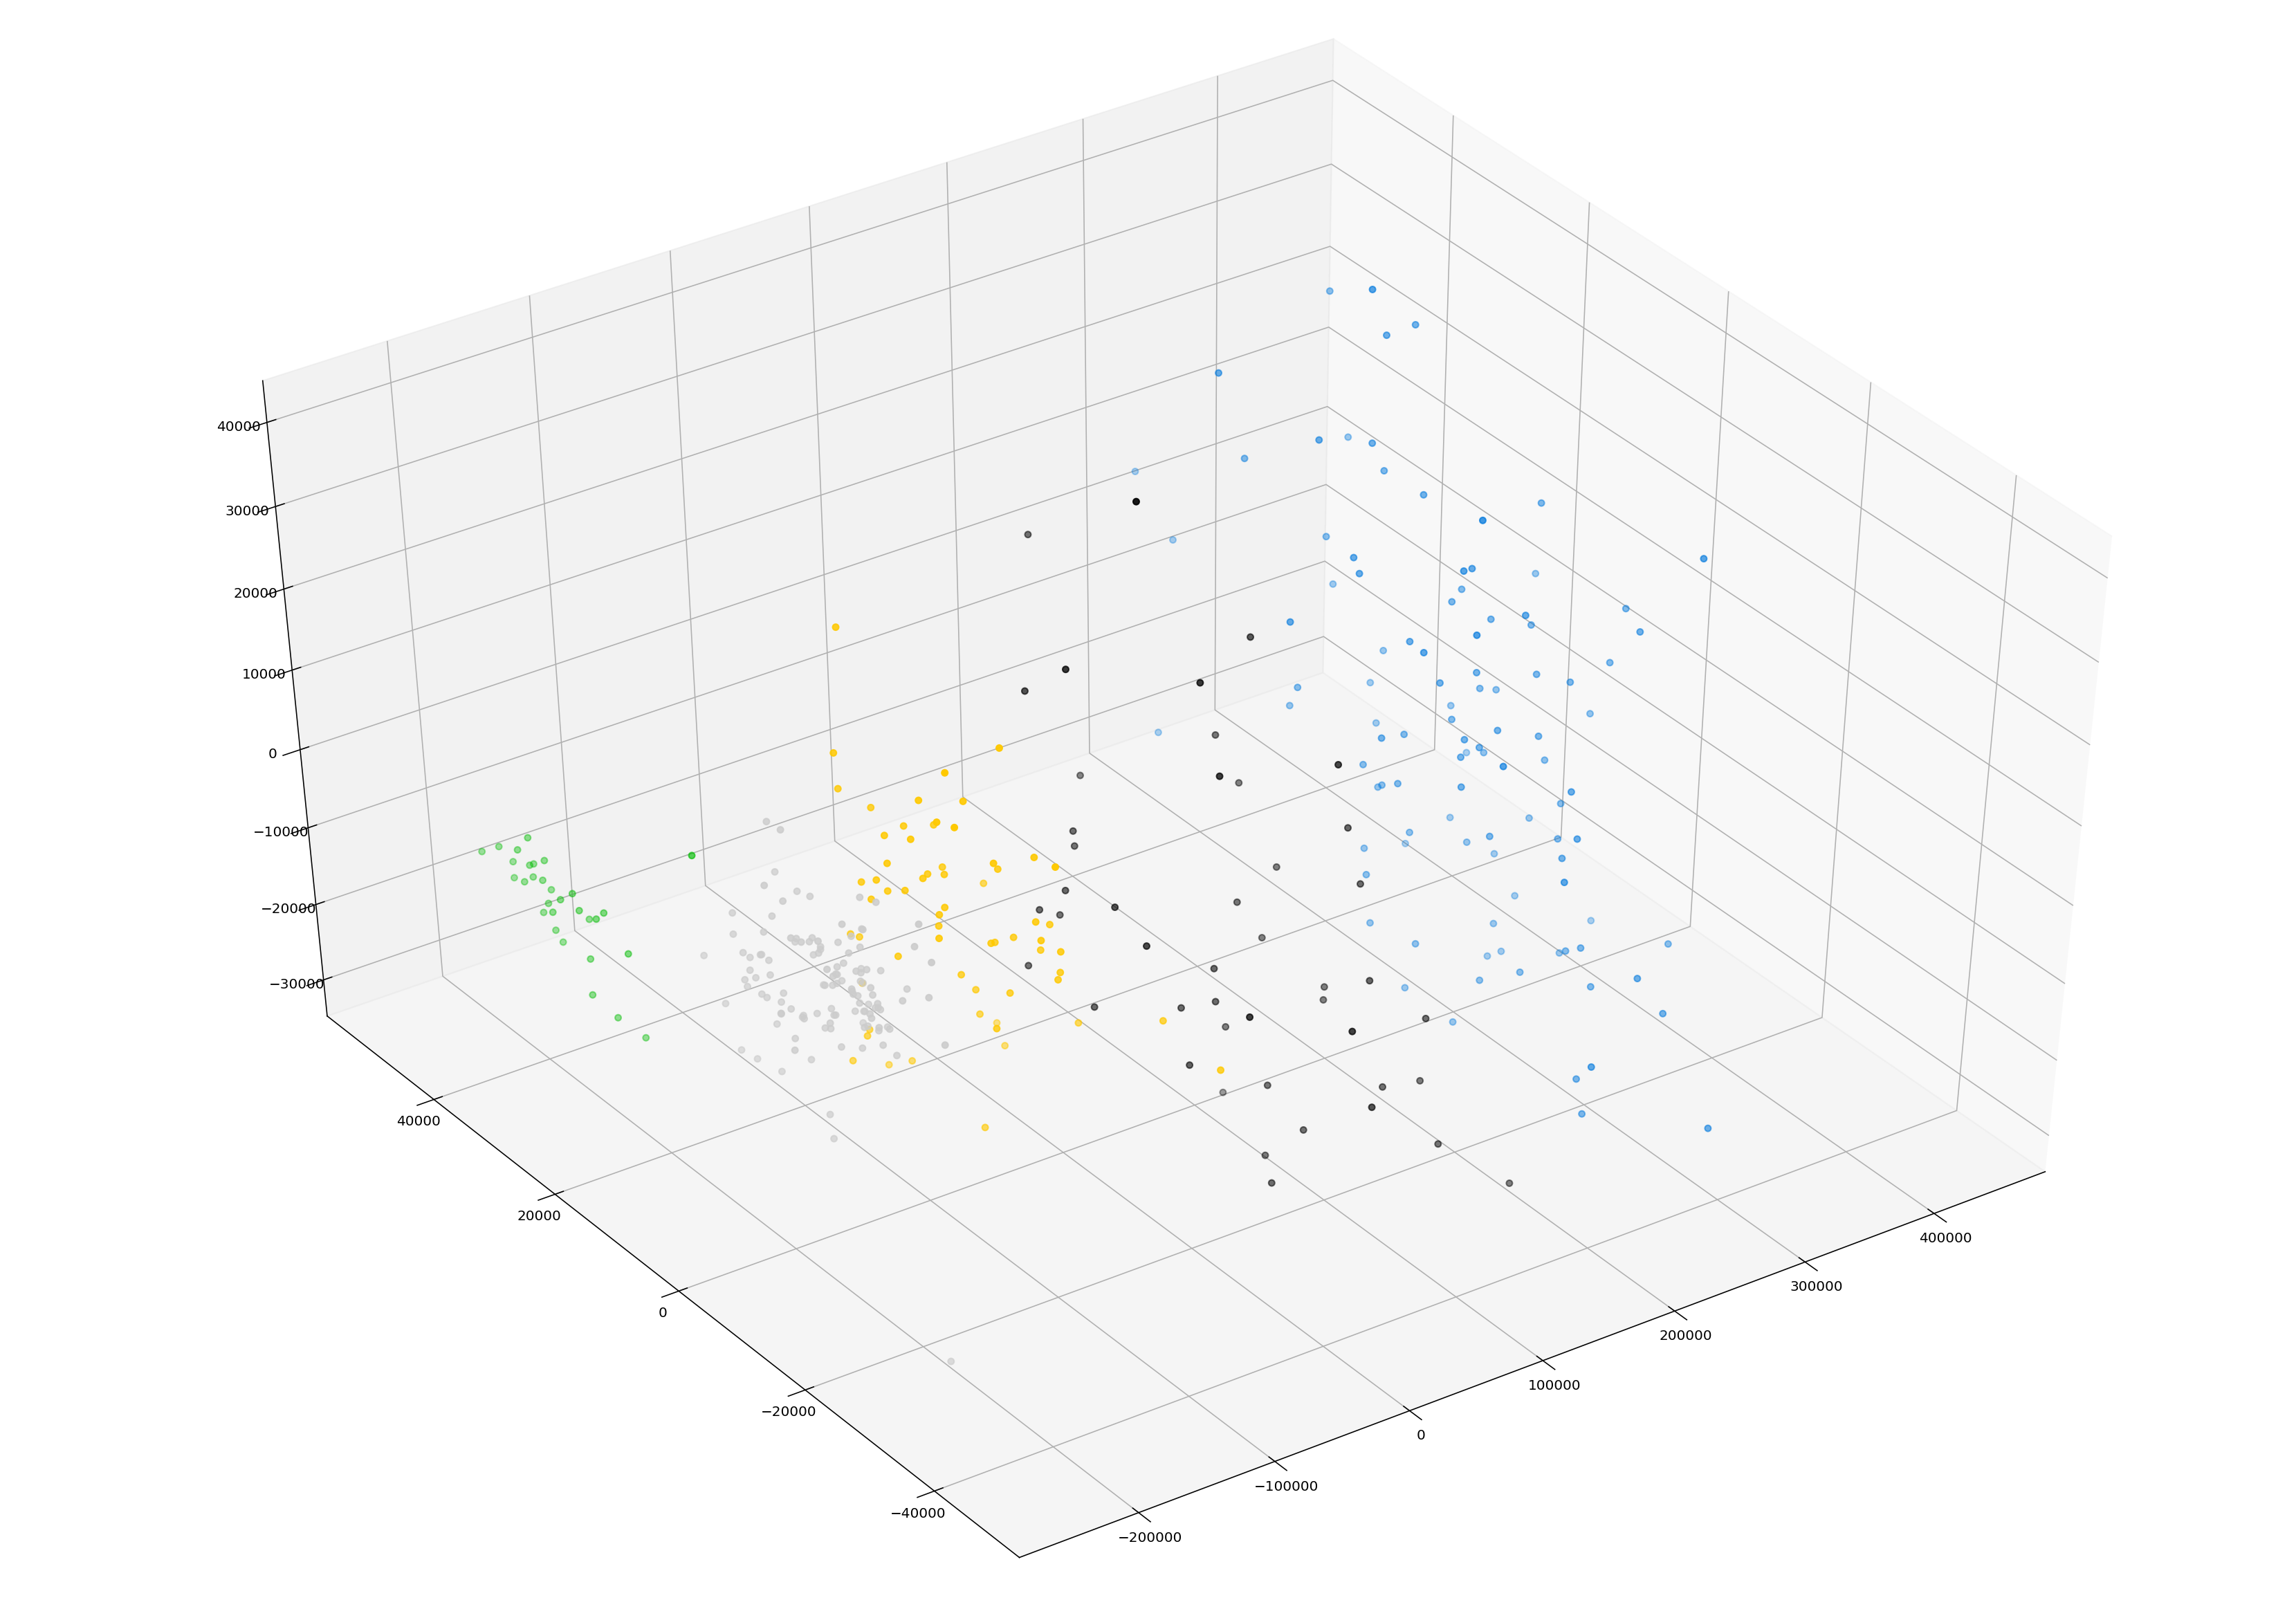

In [15]:
print(C.reshape(-1,))
fig = plt.figure(1, figsize=(24,16))


ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=235)


ax.scatter(data_pca[:,0],data_pca[:,1],data_pca[:,2],cmap=plt.cm.spectral,c=C)

plt.show()

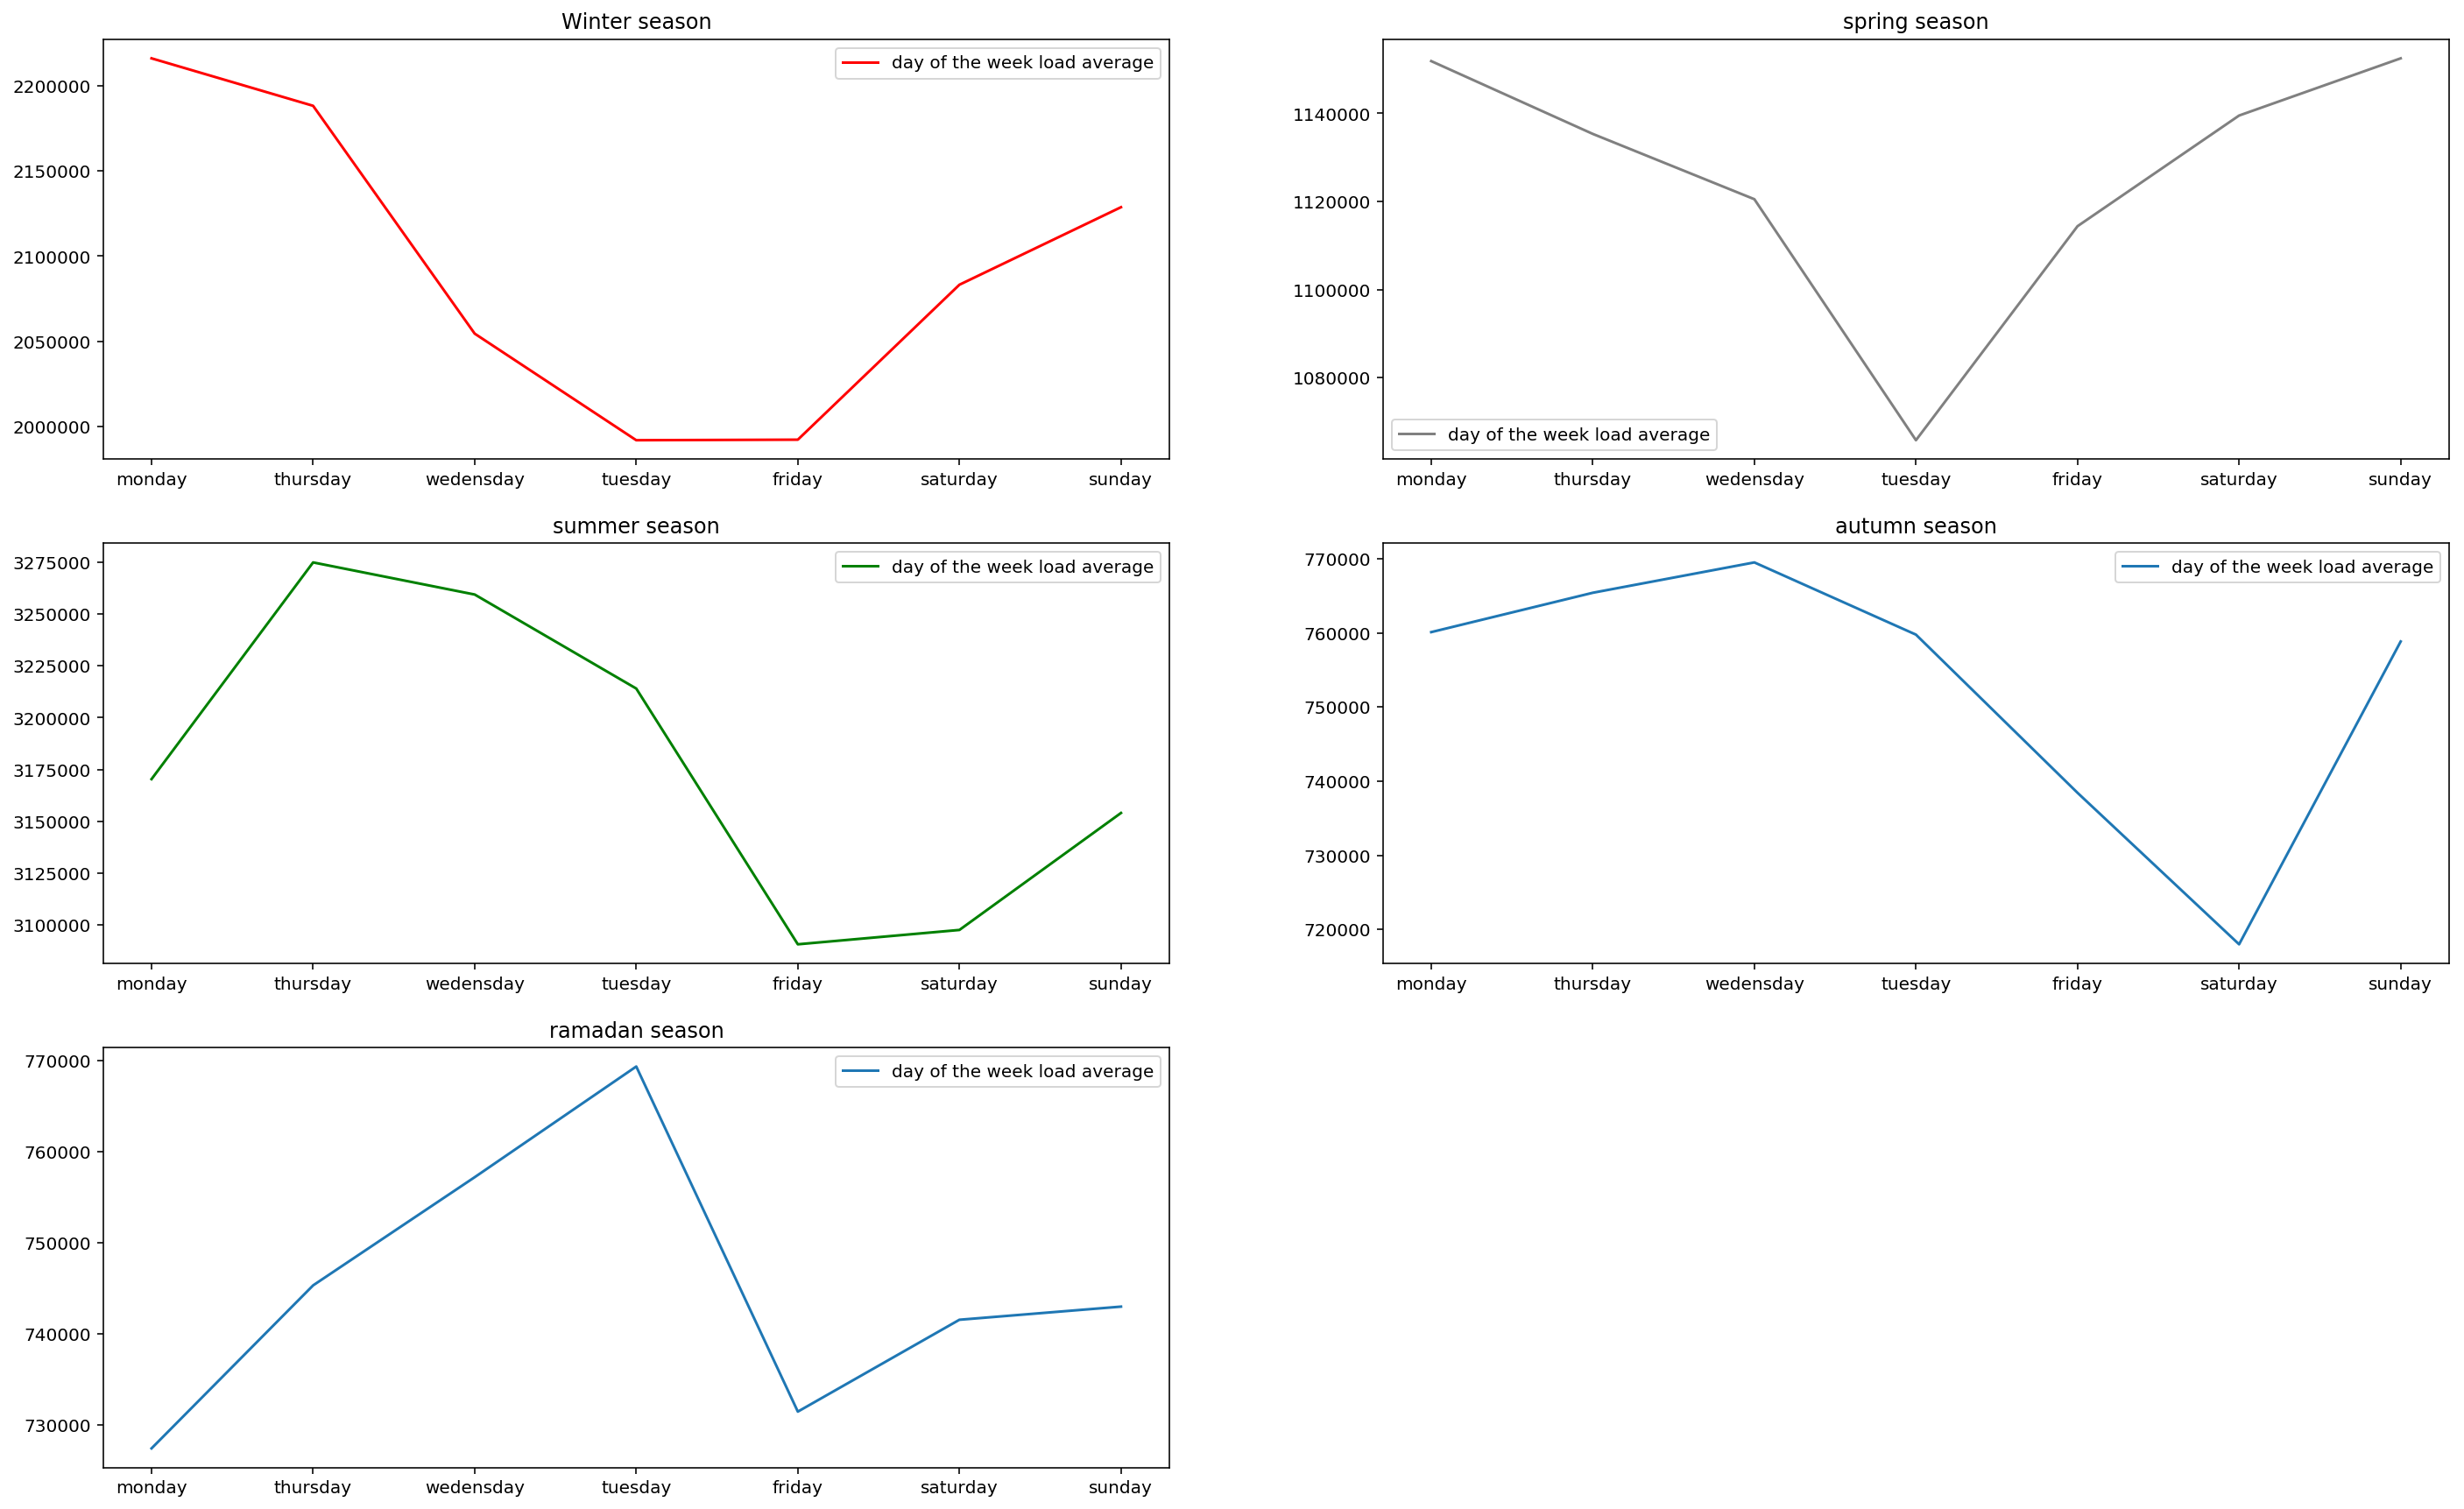

In [16]:
C= C.reshape(-1,1)
daydata['cluster']= C


W= daydata[daydata.cluster==0].iloc[:].transpose().sum()
Sp= daydata[daydata.cluster==3].iloc[:].transpose().sum()
A= daydata[daydata.cluster==2].iloc[:].transpose().sum()
S= daydata[daydata.cluster==1].iloc[:].transpose().sum()
R= daydata[daydata.cluster==4].iloc[:].transpose().sum()


days= ['monday','thursday','wedensday','tuesday','friday','saturday','sunday']

del (daydata['cluster'])

winter= np.array( [W[W.index.dayofweek==0].mean()
,W[W.index.dayofweek==1].mean()
,W[W.index.dayofweek==2].mean()
,W[W.index.dayofweek==3].mean()
,W[W.index.dayofweek==4].mean()
,W[W.index.dayofweek==5].mean()
,W[W.index.dayofweek==6].mean()])

winter= pd.DataFrame(winter.reshape(-1,1),index=days)

autumn= np.array( [A[A.index.dayofweek==0].mean()
,A[A.index.dayofweek==1].mean()
,A[A.index.dayofweek==2].mean()
,A[A.index.dayofweek==3].mean()
,A[A.index.dayofweek==4].mean()
,A[A.index.dayofweek==5].mean()
,A[A.index.dayofweek==6].mean()])

autumn= pd.DataFrame(autumn.reshape(-1,1),index=days)

spring= np.array( [Sp[Sp.index.dayofweek==0].mean()
,Sp[Sp.index.dayofweek==1].mean()
,Sp[Sp.index.dayofweek==2].mean()
,Sp[Sp.index.dayofweek==3].mean()
,Sp[Sp.index.dayofweek==4].mean()
,Sp[Sp.index.dayofweek==5].mean()
,Sp[Sp.index.dayofweek==6].mean()])

spring= pd.DataFrame(spring.reshape(-1,1),index=days)



summer= np.array( [S[S.index.dayofweek==0].mean()
,S[S.index.dayofweek==1].mean()
,S[S.index.dayofweek==2].mean()
,S[S.index.dayofweek==3].mean()
,S[S.index.dayofweek==4].mean()
,S[S.index.dayofweek==5].mean()
,S[S.index.dayofweek==6].mean()])

summer= pd.DataFrame(summer.reshape(-1,1),index=days)



ramadan= np.array( [R[R.index.dayofweek==0].mean()
,R[R.index.dayofweek==1].mean()
,R[R.index.dayofweek==2].mean()
,R[R.index.dayofweek==3].mean()
,R[R.index.dayofweek==4].mean()
,R[R.index.dayofweek==5].mean()
,R[R.index.dayofweek==6].mean()])

ramadan= pd.DataFrame(ramadan.reshape(-1,1),index=days)


fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(24,15))

ax1=plt.subplot(3,2,1)
plt.plot(np.array(winter),label='day of the week load average',color='red')
plt.legend(loc='best')
plt.xticks(range(0,7),days)

ax2=plt.subplot(3,2,2)
plt.plot(np.array(spring),label='day of the week load average',color='gray')
plt.legend(loc='best')
plt.xticks(range(0,7),days)


ax3=plt.subplot(3,2,3)
plt.plot(np.array(summer),label='day of the week load average',color='green')
plt.legend(loc='best')
plt.xticks(range(0,7),days)


ax4=plt.subplot(3,2,4)
plt.plot(np.array(autumn),label='day of the week load average')
plt.legend(loc='best')
plt.xticks(range(0,7),days)

ax5=plt.subplot(3,2,5)
plt.plot(np.array(ramadan),label='day of the week load average')
plt.legend(loc='best')
plt.xticks(range(0,7),days)


ax1.title.set_text('Winter season')
ax2.title.set_text('spring season')
ax3.title.set_text('summer season')
ax4.title.set_text('autumn season')
ax5.title.set_text('ramadan season')

plt.show()

np.savetxt('../data/GP_5_clusters.txt',C,delimiter=',')
